Folder with information and data can be found here: https://drive.google.com/drive/folders/11FoXpr5D7klvTGmSRIYl6jDK9rbq1QDc?usp=sharing . Let me know if you still cannot access it.

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [6]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics.pairwise import rbf_kernel
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import math
import networkx

In [7]:
mosquitodata = pd.read_csv('/content/drive/MyDrive/SPRING - AZ/systems bio/final project data/mosquito counting - Sheet1.csv')
env_data = pd.read_csv('/content/drive/MyDrive/SPRING - AZ/systems bio/final project data/Rio de Janeiro_raw - Página1 (1).csv')

In [8]:
results = mosquitodata['total']
results_train = results[:9] #training set
results_test = results[9:] #test set

In [27]:
 
s = np.random.uniform(0, 32, 1000) 
#^ extract a bunch of random samples from distribution between current day and 21 days past
x_vals = []
days_lst = []
potential = 0
for i in range(1000):
    val = int(round(s[i], 0)) #clean data for index call
    the_startingday = 32 - val #hypothetical starting date
    days_lst.append(the_startingday) #starting day considered
    lst = []
    for j in range(12): #length of mosquito data
        lst.append([])
        lst[j].append(env_data['precip'][the_startingday + j]) #add to list
        lst[j].append(env_data['Temp Comp Media'][the_startingday + j])
        lst[j].append(env_data['Umidade Relativa Media'][the_startingday + j])
    x_vals.append(lst)

best = -1000
bestk = 0
best_potential = 0

for k in range(len(x_vals)):
  x_vals_train = x_vals[k][:9] #split into training and test sets
  x_vals_test = x_vals[k][9:]
  rbf_svc = SVC(kernel='linear')
  rbf_svc.fit(x_vals_train, results_train) #fit into a linear SVM
  potential = rbf_svc.predict(x_vals_train) #predict future values
  score = round(metrics.r2_score(results_train, potential), 2) #score accuracy
  if score == 1:
      potential = rbf_svc.predict(x_vals_test) #predict future values
      score = round(metrics.r2_score(results_test, potential), 2) #score accuracy
      if score > best: #if better
          best = score #update best R_2 score
          best_potential = potential #best array
          bestk = k #update best iteration name
      if score == best:
          print(days_lst[k])



14
24
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9


In [28]:
best #best R_2 score

0.79

In [29]:
print(bestk)
print("The best option was: ", days_lst[bestk], " days before the mosquito collection date.")

31
The best option was:  9  days before the mosquito collection date.


In [31]:
metrics.mean_squared_error(results_test, best_potential)

156.66666666666666

In [19]:
best_potential #best test predictions

array([37, 82, 37])

In [20]:
results_test #test results

9     23
10    89
11    52
Name: total, dtype: int64

# Potential Networks

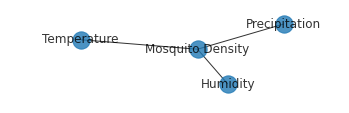

In [129]:
G = networkx.Graph()
G.add_node("Mosquito Density")
G.add_node("Temperature")
G.add_node("Humidity")
G.add_node("Precipitation")
G.add_edge("Mosquito Density","Temperature")
G.add_edge("Mosquito Density","Humidity")
G.add_edge("Mosquito Density","Precipitation")
layout = networkx.spring_layout(G)
figure = plt.subplot(2, 1, 1)

networkx.draw(
    G, pos = layout, with_labels=True,
    edge_cmap=plt.cm.binary, edge_vmin=-1, edge_vmax=4,
    alpha=0.8, vmin=0, vmax=3)
axis = plt.gca()
axis.set_xlim([1.5*x for x in axis.get_xlim()])
axis.set_ylim([1.5*y for y in axis.get_ylim()])
plt.show()